In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
data = pd.read_csv('/content/Salary Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [77]:
data.shape

(30, 2)

In [78]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [79]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [80]:
df_num = data.select_dtypes(include=['int', 'float'])

In [81]:
df_num.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


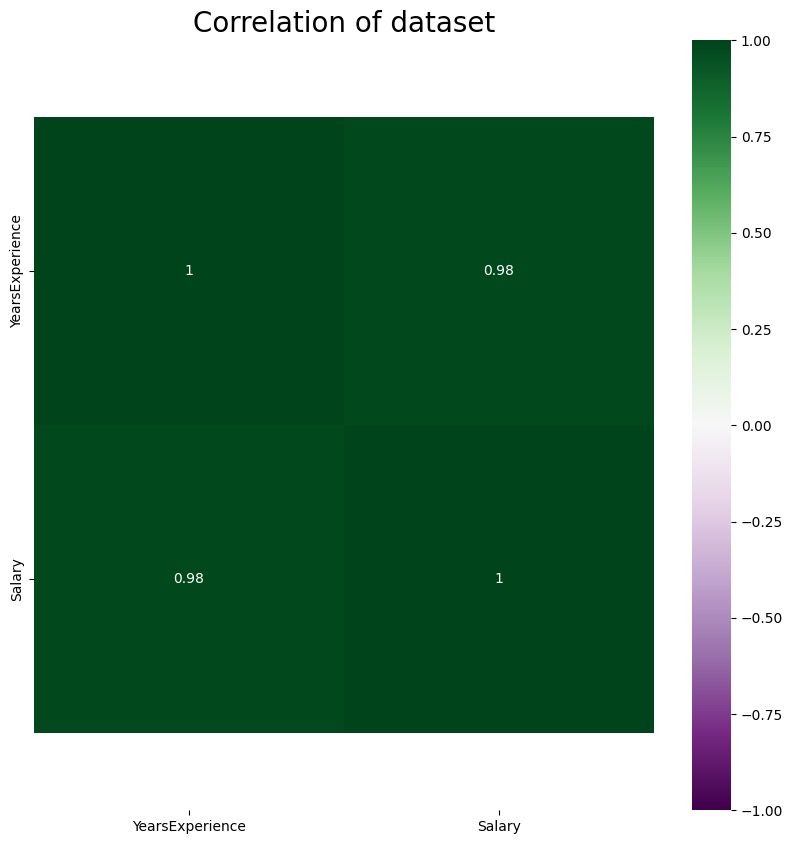

In [82]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(df_num.corr(),
                 xticklabels=df_num.corr().columns,
                 yticklabels=df_num.corr().columns,
                 cmap='PRGn',
                 vmin=-1, vmax=1,
                 annot=True, center=0)

plt.title('Correlation of dataset', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [83]:
from sklearn.model_selection import train_test_split



In [84]:
y = data['Salary']
X = data[['YearsExperience']]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model = LinearRegression()

In [87]:
X_train = X_train.values.reshape(-1, 1)

In [88]:
X_test = X_test.values.reshape(-1, 1)

In [89]:
model.fit(X_train, y_train)

LinearRegression()

In [66]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [90]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [91]:
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

In [92]:
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

In [93]:
r2_train

0.9645401573418146

In [94]:
mae_train

4221.046734449738

In [95]:
mse_train

27102249.73126139

In [96]:
rmse_train

5205.982110155719

In [98]:
r2_test

0.9024461774180497

In [99]:
mae_test

6286.453830757749

In [100]:
mse_test

49830096.85590839

In [101]:
rmse_test

7059.04362190151

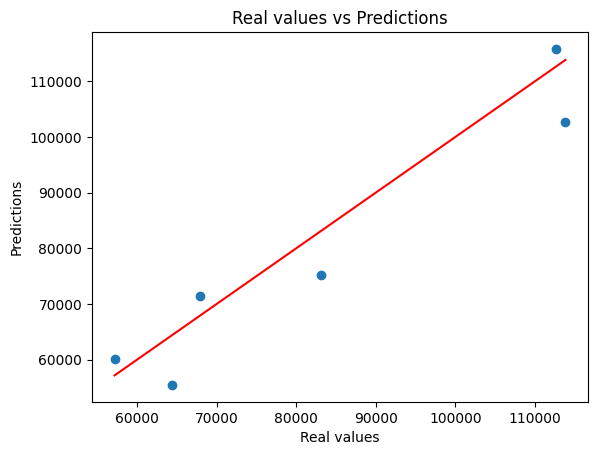

In [102]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-')
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Real values vs Predictions')
plt.show()
